# 1119007
# Timothy Ray

# Insurance Segmentation

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Plot the data

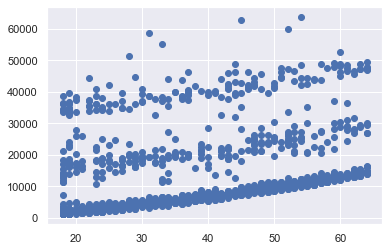

In [19]:
plt.scatter(data["age"], data["charges"])

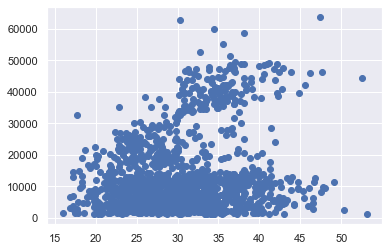

In [5]:
plt.scatter(data["bmi"], data["charges"])

## Select the features

In [6]:
data=data.drop(['sex'], axis=1)
data=data.drop(['smoker'], axis=1)
data=data.drop(['region'], axis=1)
data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [7]:
x = data.copy()

## Clustering¶

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering result

In [9]:
clusters = x.copy()
clusters["cluster_pred"] = kmeans.fit_predict(x)

In [10]:
clusters

,age,bmi,children,charges,cluster_pred
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1
1334,18,31.920,0,2205.98080,1
1335,18,36.850,0,1629.83350,1
1336,21,25.800,0,2007.94500,1


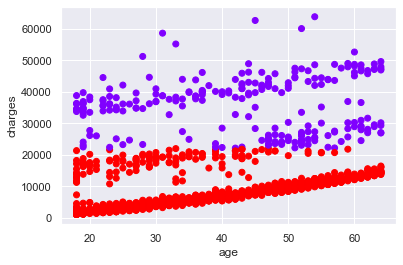

In [39]:
plt.scatter(data["age"], data['charges'], c=clusters["cluster_pred"], cmap="rainbow")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

## Standardize the variables

In [40]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

## Take the advantages of elbow method

In [41]:
wcss = []
for i in range(1,50):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[5352.000000000008,
 4087.8937482770266,
 3311.7537736459044,
 2572.330124982171,
 2208.425382853673,
 1983.5956599895667,
 1799.4116575068288,
 1659.545558805972,
 1554.2451480357736,
 1459.6855774367343,
 1367.303099431198,
 1299.2701077137706,
 1244.8052411565768,
 1181.893738155036,
 1127.2784430964339,
 1080.3889549820324,
 1028.0491485527941,
 983.2071669834664,
 947.3554775217755,
 923.793014650639,
 890.9030639299569,
 865.6564162188871,
 843.044314295929,
 817.1102949864103,
 809.0355064230924,
 776.9699400649681,
 766.4603586376228,
 747.6582303017323,
 732.7201659618751,
 705.4828224802246,
 696.3726121255253,
 680.6063535378544,
 662.5565153052178,
 660.3377091396443,
 643.6253205581519,
 628.0205439720924,
 612.4694443518028,
 600.3018061079879,
 597.67909425255,
 585.634285209649,
 577.8692161980329,
 563.8356498767545,
 551.8600182348114,
 545.4233687689585,
 535.7087611957106,
 527.5587859433292,
 523.8181639721389,
 508.5215131589741,
 499.1315613089692]

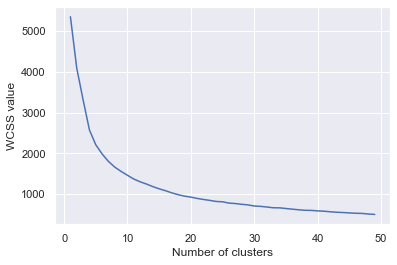

In [42]:
plt.plot(range(1,50), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

## Advanced Clustering

In [46]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,age,bmi,children,charges,cluster_pred
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,2
1334,18,31.920,0,2205.98080,1
1335,18,36.850,0,1629.83350,1
1336,21,25.800,0,2007.94500,1


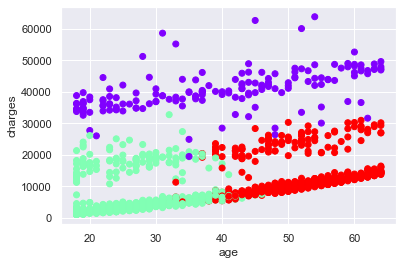

In [47]:
plt.scatter(clusters_new["age"], clusters_new["charges"],c=clusters_new["cluster_pred"],cmap="rainbow")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

## Dari grafik dapat disimpulkan bahwa grafik terbagi dalam 3 cluster.
## 1. Kelompok orang dengan biaya rumah sakit yang tinggi
## 2. Kelompok generasi milenial dengan biaya rumah sakit rendah
## 3. Kelompok orang dewasa dengan biaya rumah sakit rendah